## Cluster Analysis
### Business Objective:
Creating clusters on global development measurement dataset

Data Set Details:
The dataset has information about important economic and development metrics related to various countries across the globe.
## Variable Description:
Birth Rate, Business tax, CO2emissions, Country, Days to start business, Ease of business, energy usage, GDP, healthexp%GDP, healthexp/capita, hours to do tax, infant mortality, internet usage, lending rate, life expectancy female, etc.
## Acceptance Criterion: 
Work on different clustering models, do a comparative analysis and need to deploy the clustering application on streamlit, flask etc.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
data=pd.read_excel(r"C:\Users\aravi\OneDrive\Desktop\Project Files\World_development_mesurement.xlsx")
df=data.copy()

# Exploratory Data Analysis

In [3]:
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Country,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,...,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
df.shape

(2704, 25)

In [5]:
df.columns

Index(['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions', 'Country',
       'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
       'Health_Exp%GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
       'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
       'Number_of_Records', 'Population_0to14', 'Population_15to64',
       'Population_65plus', 'Population_Total', 'Population_Urban',
       'Tourism_Inbound', 'Tourism_Outbound'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2585 non-null   float64
 1   Business_Tax_Rate       1423 non-null   object 
 2   CO2_Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  1718 non-null   float64
 5   Ease_of_Business        185 non-null    float64
 6   Energy_Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health_Exp%GDP          2395 non-null   float64
 9   Health_Exp/Capita       2395 non-null   object 
 10  Hours_to_do_Tax         1416 non-null   float64
 11  Infant_Mortality_Rate   2444 non-null   float64
 12  Internet_Usage          2531 non-null   float64
 13  Lending_Interest        1880 non-null   float64
 14  Life_Expectancy_Female  2568 non-null   

In [7]:
df.isnull().sum()

Birth_Rate                 119
Business_Tax_Rate         1281
CO2_Emissions              579
Country                      0
Days_to_Start_Business     986
Ease_of_Business          2519
Energy_Usage               919
GDP                        210
Health_Exp%GDP             309
Health_Exp/Capita          309
Hours_to_do_Tax           1288
Infant_Mortality_Rate      260
Internet_Usage             173
Lending_Interest           824
Life_Expectancy_Female     136
Life_Expectancy_Male       136
Mobile_Phone_Usage         167
Number_of_Records            0
Population_0to14           220
Population_15to64          220
Population_65plus          220
Population_Total             0
Population_Urban            26
Tourism_Inbound            368
Tourism_Outbound           471
dtype: int64

In [8]:
# Check for duplicates
duplicates = df.duplicated()

# Count number of duplicates
num_duplicates = duplicates.sum()

print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [9]:
df.describe()

,Birth_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,Health_Exp%GDP,Hours_to_do_Tax,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Number_of_Records,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [10]:
# Dropping Number of Records
df=df.drop('Number_of_Records',axis=1)

### Removed Number of Records feature since its standard deviation is 0, it does means that there no variability in the data and all the values are same, the feature doesnt provide any information to analyse, so we need to remove it 

In [11]:
def Stringfunction(x):
    if isinstance(x, str):
        x = x.replace('$','')
        x = x.replace(',', '')
        x = x.replace('%', '')
        x = float(x)
    elif isinstance(x, float):
        pass  # no need to do anything if it's already a float
    else:
        try:
            x = x.replace('$','')
            x = x.replace(',', '')
            x = x.replace('%', '')
            x = float(x)
        except:
            pass
    return x

In [12]:
df=df.drop('Country', axis=1)

In [13]:
df = df.applymap(Stringfunction)
df['Country']=data['Country']
df.head()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,Algeria
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,Angola
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,Benin
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,Botswana
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,Burkina Faso


In [14]:
df.corr()

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
Birth_Rate,1.000000,0.288982,-0.175750,0.169013,0.727492,-0.169664,-0.195565,-0.227653,-0.463907,0.069324,...,-0.868174,-0.825745,-0.558411,0.955966,-0.912837,-0.773014,-0.057851,-0.606933,-0.287021,-0.296049
Business_Tax_Rate,0.288982,1.000000,0.022298,0.013339,0.287221,0.059210,0.005880,0.034727,-0.110941,0.138647,...,-0.284273,-0.312970,-0.233985,0.218907,-0.258508,-0.106498,0.058711,-0.123177,-0.017257,-0.021214
CO2_Emissions,-0.175750,0.022298,1.000000,-0.055666,NaN,0.988715,0.801876,0.163236,0.254039,0.081485,...,0.135219,0.141452,0.054400,-0.198328,0.190808,0.160403,0.721145,0.098051,0.696357,0.650080
Days_to_Start_Business,0.169013,0.013339,-0.055666,1.000000,0.308789,-0.069418,-0.079282,-0.147686,-0.181849,0.148423,...,-0.197764,-0.213764,-0.199868,0.203978,-0.166224,-0.201973,0.001357,-0.092493,-0.122206,-0.117471
Ease_of_Business,0.727492,0.287221,NaN,0.308789,1.000000,-0.234867,-0.227305,-0.278061,-0.573508,0.346213,...,-0.709671,-0.706122,-0.582954,0.741035,-0.631452,-0.646456,0.029175,-0.493255,-0.339292,-0.314160
Energy_Usage,-0.169664,0.059210,0.988715,-0.069418,-0.234867,1.000000,0.861041,0.253146,0.278551,0.074673,...,0.125224,0.132984,0.045198,-0.184007,0.171528,0.148971,0.677971,0.094218,0.742379,0.703488
GDP,-0.195565,0.005880,0.801876,-0.079282,-0.227305,0.861041,1.000000,0.329416,0.451492,0.030371,...,0.196762,0.207653,0.129847,-0.234099,0.161611,0.275494,0.379295,0.185874,0.879849,0.856945
Health_Exp%GDP,-0.227653,0.034727,0.163236,-0.147686,-0.278061,0.253146,0.329416,1.000000,0.444986,-0.079755,...,0.208335,0.219441,0.187336,-0.292266,0.093604,0.489835,-0.054097,0.205994,0.379051,0.371141
Health_Exp/Capita,-0.463907,-0.110941,0.254039,-0.181849,-0.573508,0.278551,0.451492,0.444986,1.000000,-0.213454,...,0.499595,0.540419,0.460803,-0.529232,0.362444,0.623775,-0.005934,0.520300,0.556093,0.579977
Hours_to_do_Tax,0.069324,0.138647,0.081485,0.148423,0.346213,0.074673,0.030371,-0.079755,-0.213454,1.000000,...,-0.104772,-0.154317,-0.103461,0.075677,-0.084376,-0.043624,0.146920,0.010022,-0.058792,-0.040801


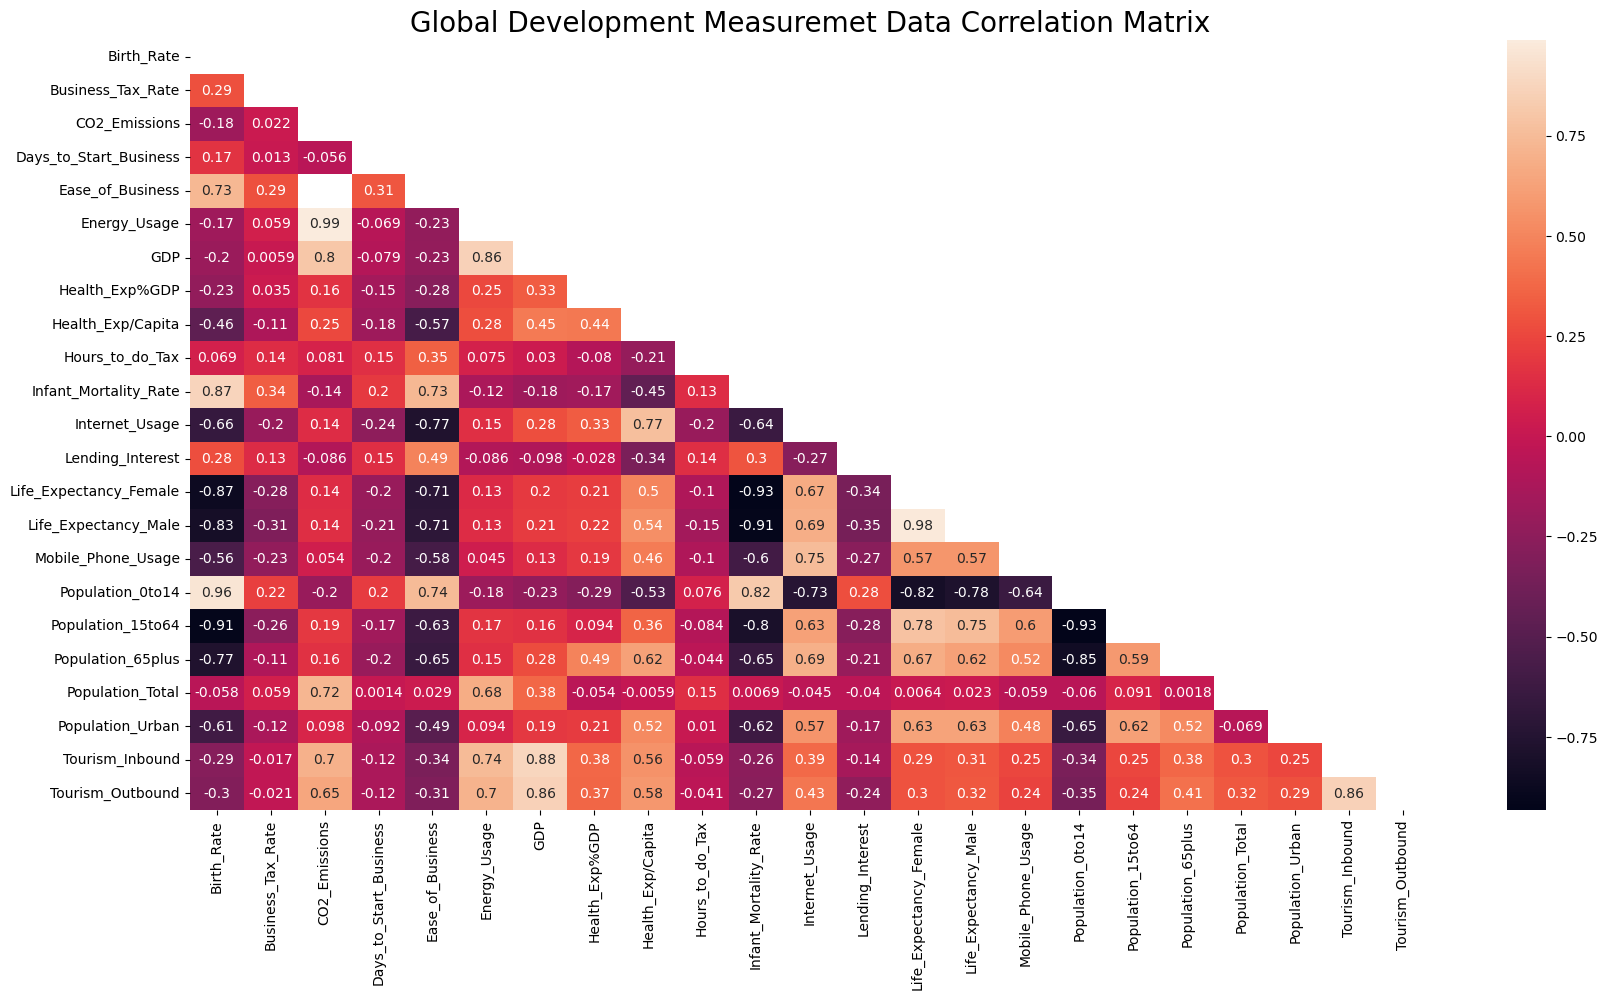

In [15]:
# Representation of correlation matrix using Heatmap
# Generate a mask for the upper triangle
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Global Development Measuremet Data Correlation Matrix', fontsize=20)
plt.show()


### Key Insights and Patterns from Above Correlation matrix of Heatmap:

### 1. Energy Usage and CO2 Emissions are highly positively correlated, The Energy generated through coal, natural gas, petroleum & fossil fuel causes high CO2 Emissions


### 2. Highly Positive correlation between Population of 0 to 14 and the Birth Rate, in general the population from 0 to 14 directly depends on Birth Rate. If the Birth_Rate increases the Population from 0 to 14 increases, vice versa.


### 3. Highly Positive correlation between Life Expectancy Female and Infant Mortality Rate & Life Expectancy Male and Infant Mortality Rate, Life expectancy of both male and female highly affected by infant mortality.


### 4. Tourism Inbound, Outbound are positively correlated with GDP.

## From the above observations we can see that the data has many underlying relationships between several variables to deal with collinearity problem we should use dimenionality reduction techniques to reduce the dimensions and getting most of the information/variability from the data

## Now lets understand the nature of the data and handle the missing values by using appropriate imputation techniques

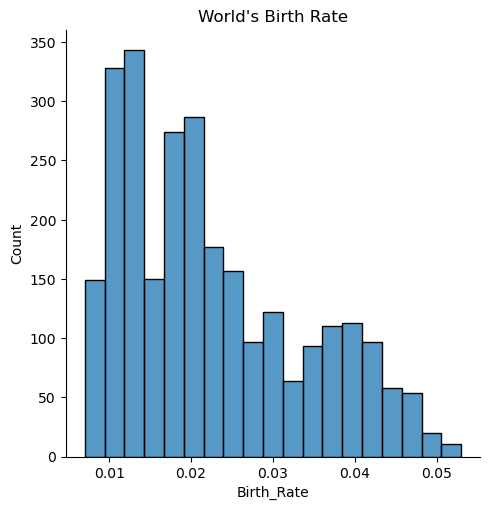

In [153]:
# Lets explore birth rate
sns.displot(df['Birth_Rate'])
plt.title("World's Birth Rate")
plt.show()

### Key Insights from the above plot:
1. The Birth_Rate data is asymmetrical
2. It is right skewed distribution
3. The Global Most frequent Birth Rate is 0.01

In [17]:
df['Country'].nunique()

208

In [18]:
df['Country'].value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

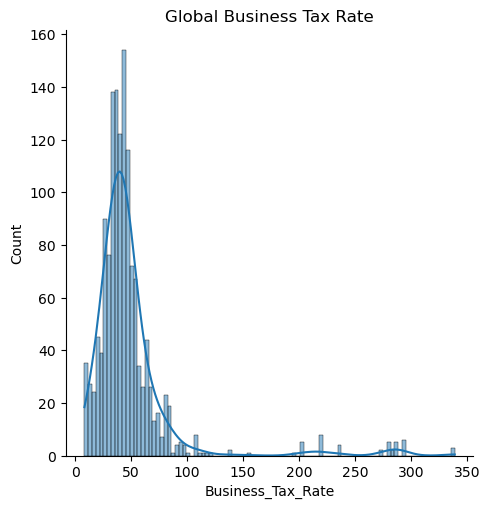

In [19]:
# Representation of Global business Tax Rate by using distplot
sns.displot(x='Business_Tax_Rate', data=df, kde=True)
plt.title('Global Business Tax Rate')
plt.show()

### Key insights from the Data:
1. The Business Tax Rate data is a letpo kurtic distribution and Positive skewed
2. The Global Business Tax Rate is highly occuring in between 20-55%
3. Few countries having Business Tax Rate as more than 100%

In [20]:
df['CO2_Emissions']

0       87931.0
1        9542.0
2        1617.0
3        4276.0
4        1041.0
         ...   
2699        NaN
2700        NaN
2701        NaN
2702        NaN
2703        NaN
Name: CO2_Emissions, Length: 2704, dtype: float64

In [21]:
df['CO2_Emissions']=df['CO2_Emissions'].astype(float)

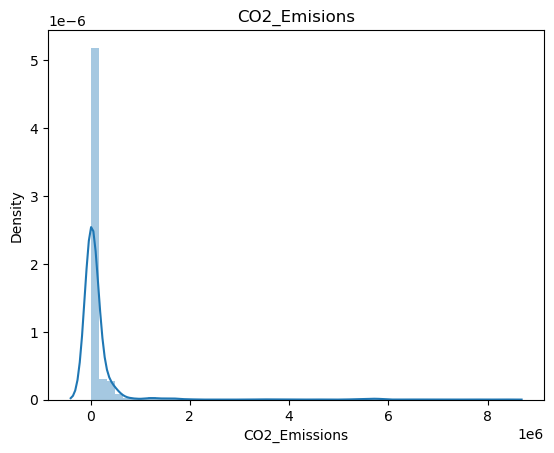

In [22]:
sns.distplot(df['CO2_Emissions'])
plt.title('CO2_Emisions')
plt.show()

In [23]:
print('The total Countries are: ', df['Country'].nunique(),'\n')
print('The country Names are as follows:', "\n\n", df['Country'].unique())

The total Countries are:  208 

The country Names are as follows: 

 ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 '

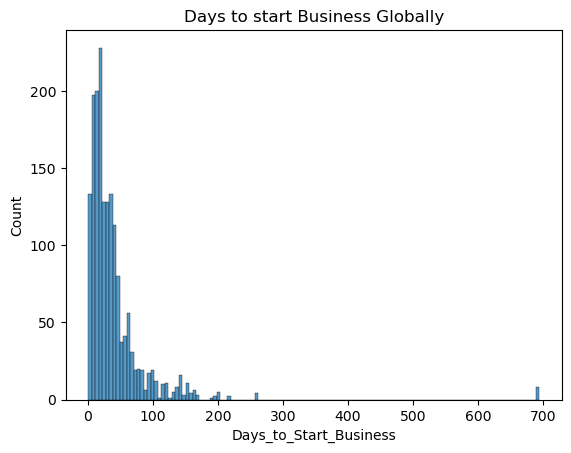

In [24]:
# Plotting the number of Days to start business globally
sns.histplot(df['Days_to_Start_Business'])
plt.title('Days to start Business Globally')
plt.show()

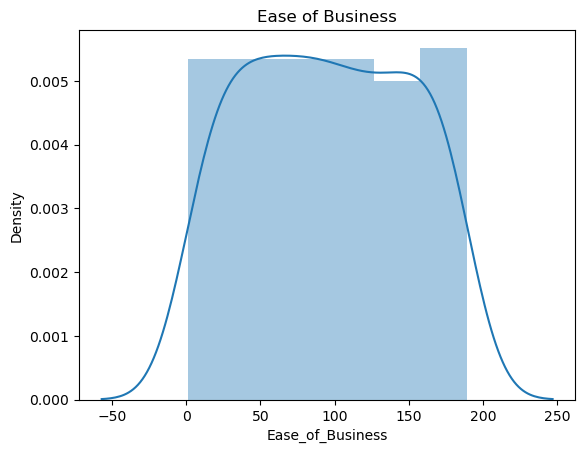

In [25]:
sns.distplot(df['Ease_of_Business'])
plt.title('Ease of Business')
plt.show()

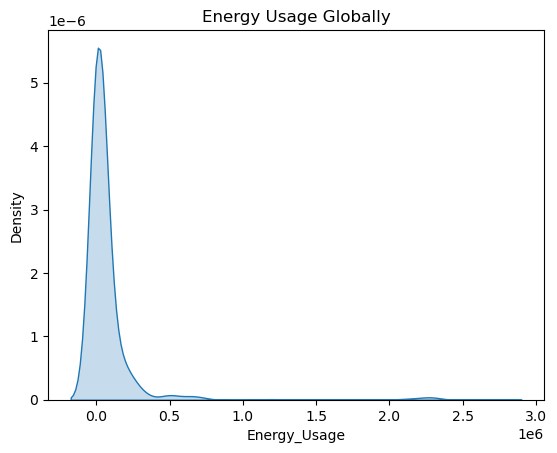

In [26]:
# Plotting Energy Usage Data
sns.kdeplot(df['Energy_Usage'],shade=True)
plt.title('Energy Usage Globally')
plt.show()

In [27]:
# Convert the Birth Rate column to a float data type
df['GDP'] = df['GDP'].astype(float)
print( df['GDP'].min() )
print( df['GDP'].max() )

63101272.0
16244600000000.0


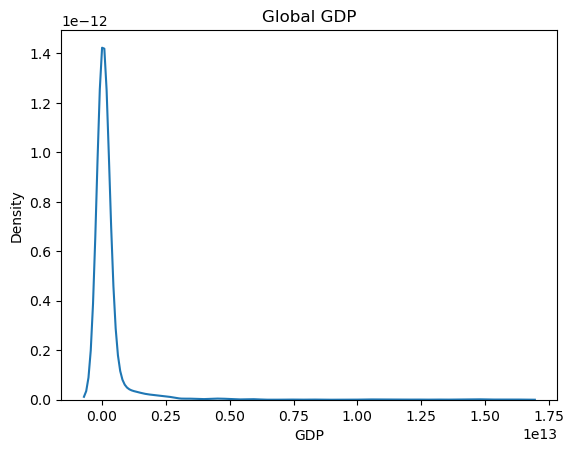

In [28]:
sns.kdeplot(df['GDP'])
plt.title('Global GDP')
plt.show()

mean 0.06416951983298544
median 0.061 

mode 0    0.056
1    0.063
Name: Health_Exp%GDP, dtype: float64


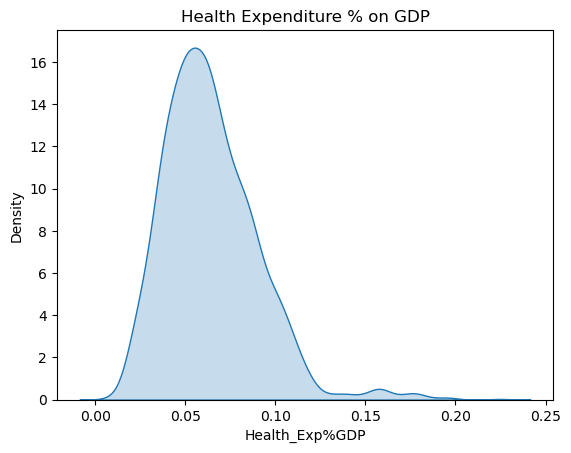

In [29]:
# plotting Health Expenditure % on GDP
print('mean',df['Health_Exp%GDP'].mean())
print('median',df['Health_Exp%GDP'].median(),'\n')

print('mode',df['Health_Exp%GDP'].mode())


sns.kdeplot(x='Health_Exp%GDP', data=df, shade=True)
plt.title('Health Expenditure % on GDP')
plt.show()

### Key Insights from the above KDEplot:
1. The Health expenditure on the GDP is slightly right skewed
2. Almost 95% of the countries health expenditure is falling in between 0.02 to 0.10 % of their GDP

In [30]:
df['Health_Exp/Capita']=df['Health_Exp/Capita'].astype(float)

count    2395.000000
mean      801.397077
std      1473.448036
min         2.000000
25%        50.000000
50%       193.000000
75%       665.000000
max      9908.000000
Name: Health_Exp/Capita, dtype: float64


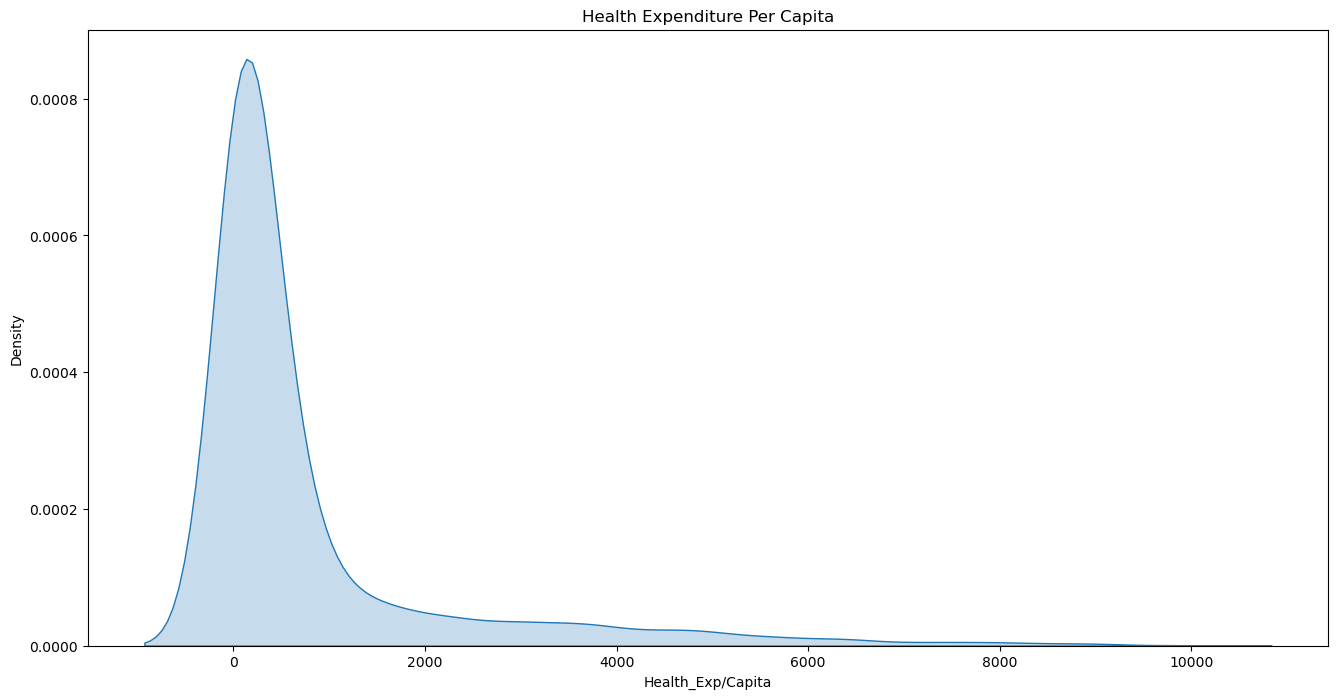

In [31]:
# Health Exp/Capita
print(df['Health_Exp/Capita'].describe())
plt.figure(figsize=(16,8))
sns.kdeplot(x='Health_Exp/Capita', data=df, shade=True)
plt.title('Health Expenditure Per Capita')
plt.show()


### Key Observations:
1. The Health Expenditure per capita data is right skewed distribution
2. The most of the countries Health expenditure per capita is falling below 2000

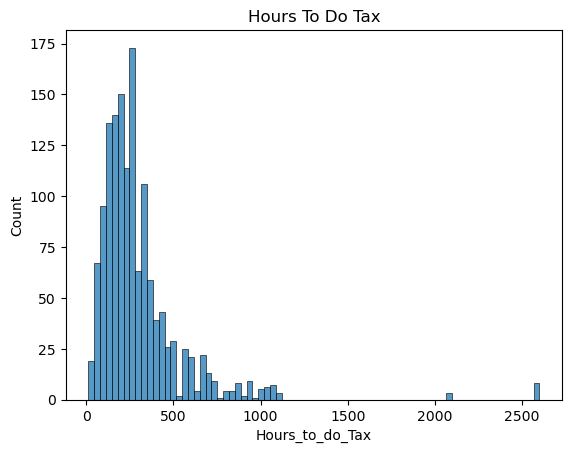

In [32]:
sns.histplot(df['Hours_to_do_Tax'])
plt.title('Hours To Do Tax')
plt.show()

count    2444.000000
mean        0.032813
std         0.029968
min         0.002000
25%         0.009000
50%         0.020000
75%         0.053000
max         0.141000
Name: Infant_Mortality_Rate, dtype: float64


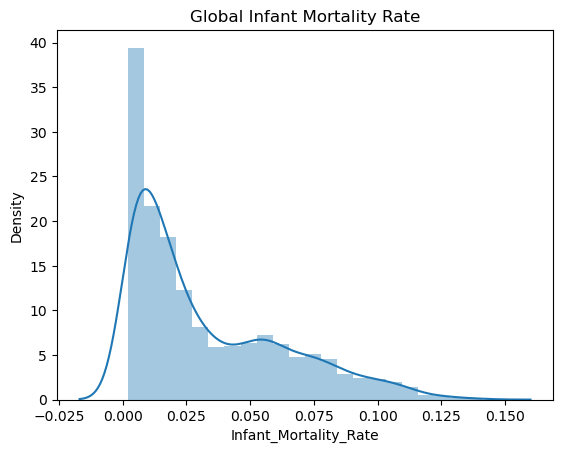

In [33]:
# Plotting Infant Mortality Rate
print(df['Infant_Mortality_Rate'].describe())
sns.distplot(df['Infant_Mortality_Rate'])
plt.title('Global Infant Mortality Rate')
plt.show()

###  Key Observations:
1. Global Infant Mortality Rate is right skewed distribution
2. Global Maximum Infant mortality rate is 0.141 %

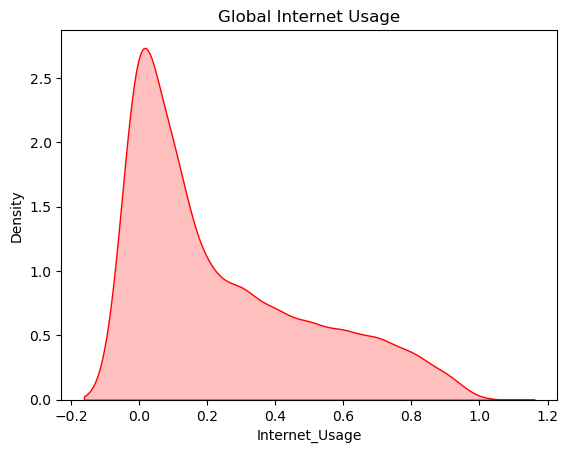

In [34]:
# Global Internet usage
sns.kdeplot(df['Internet_Usage'], shade=True, color='red')
plt.title('Global Internet Usage')
plt.show()

### Key Observations:
1. Globally Internet Usage data is right skewed distribution
2. We can see that the peakedness of the curve is at 0, hence globally the internet users are very low

count    1880.000000
mean        0.148103
std         0.171829
min         0.005000
25%         0.080000
50%         0.120000
75%         0.173000
max         4.965000
Name: Lending_Interest, dtype: float64


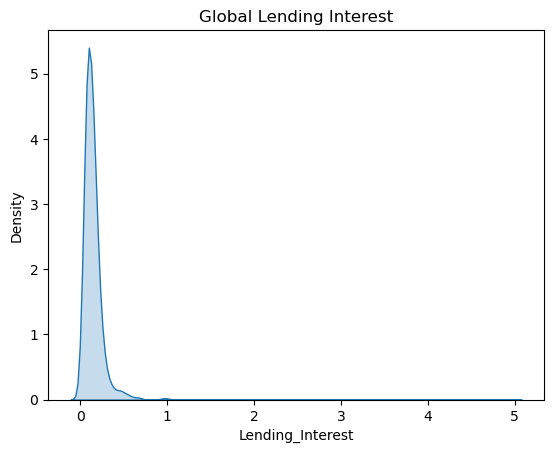

In [35]:
# Plotting Lending Interest 
print(df['Lending_Interest'].describe())
sns.kdeplot(df['Lending_Interest'], shade=True)
plt.title('Global Lending Interest')
plt.show()

### Key Observations:
1. Global Lending Interest rate data is right skewed distribution
2. Global lending interest mostly falling below 0.5%, and the highest lending interest rate is 4.96

count    2568.000000
mean       71.159268
std        10.708262
min        39.000000
25%        64.000000
50%        75.000000
75%        79.000000
max        87.000000
Name: Life_Expectancy_Female, dtype: float64


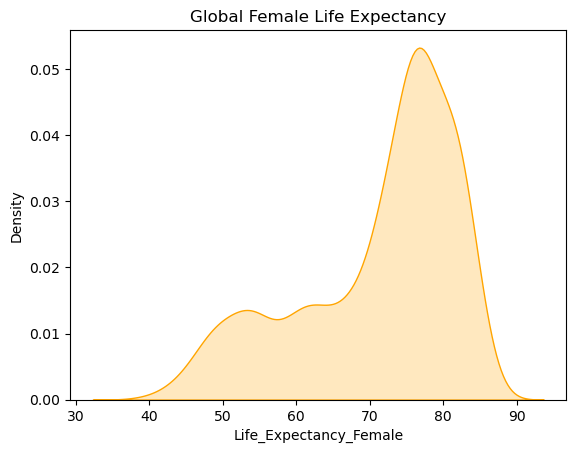

In [36]:
# plotting Life Expectancy Female
print(df['Life_Expectancy_Female'].describe())
sns.kdeplot(df['Life_Expectancy_Female'], shade=True, color='orange')
plt.title('Global Female Life Expectancy')
plt.show()

### Key Observations:
1. Global Female life expectancy data is negatively skewed distribution
2. The maximum female life expectancy is 87 years, mean life expectancy is 71 years, minimum life expectancy is 39 years

count    2568.000000
mean       66.461838
std         9.390217
min        37.000000
25%        61.000000
50%        69.000000
75%        73.250000
max        88.000000
Name: Life_Expectancy_Male, dtype: float64


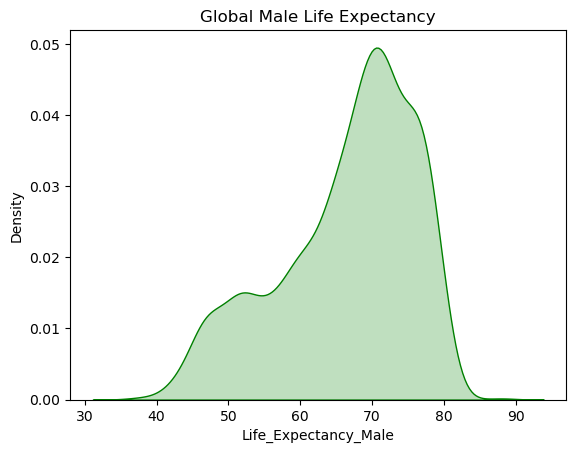

In [37]:
# plotting Life Expectancy Female
print(df['Life_Expectancy_Male'].describe())
sns.kdeplot(df['Life_Expectancy_Male'], shade=True, color='Green')
plt.title('Global Male Life Expectancy')
plt.show()

### Key Observations:
1. Global Female life expectancy data is negatively skewed distribution
2. The maximum female life expectancy is 88 years, mean life expectancy is 66 years, minimum life expectancy is 37 years

count    2537.000000
mean        0.578124
std         0.474647
min         0.000000
25%         0.100000
50%         0.500000
75%         0.900000
max         2.900000
Name: Mobile_Phone_Usage, dtype: float64


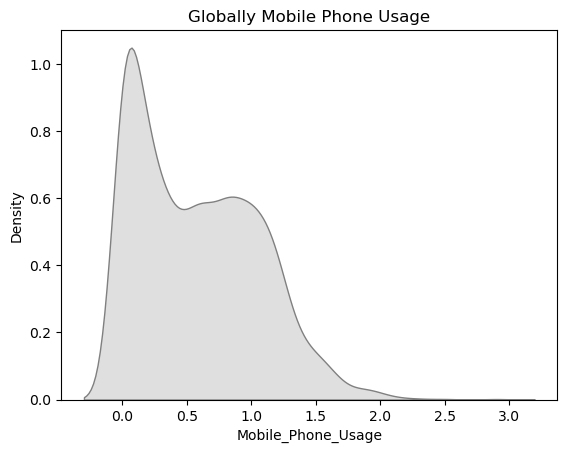

In [38]:
# Plotting Gobal mobile phone usage 
print(df['Mobile_Phone_Usage'].describe())
#sns.kdeplot(x='Mobile_Phone_Usage', hue='Country', data=df)
sns.kdeplot(df['Mobile_Phone_Usage'], shade=True, color='Grey')
plt.title('Globally Mobile Phone Usage')
plt.show()

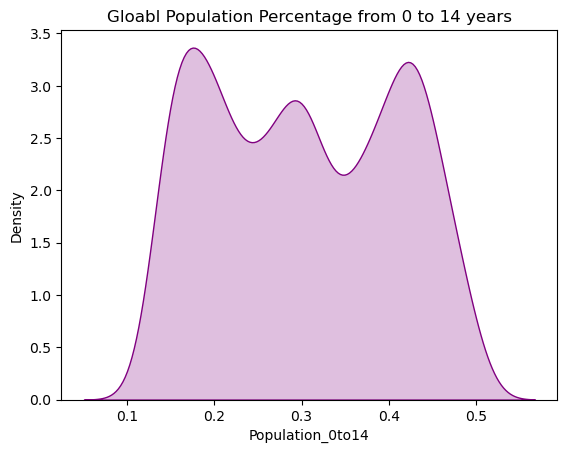

In [39]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_0to14'], shade=True, color='purple')
plt.title('Gloabl Population Percentage from 0 to 14 years')
plt.show()

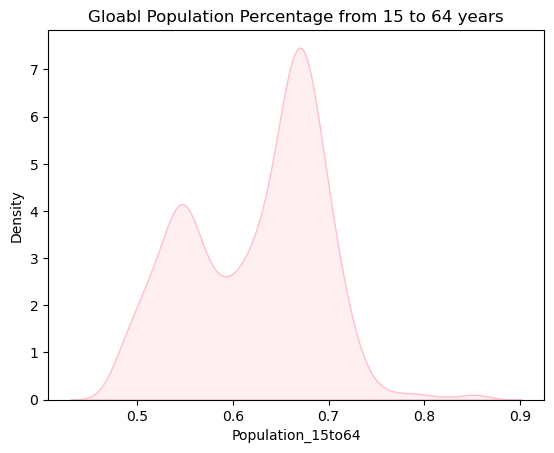

In [40]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_15to64'], shade=True, color='pink')
plt.title('Gloabl Population Percentage from 15 to 64 years')
plt.show()

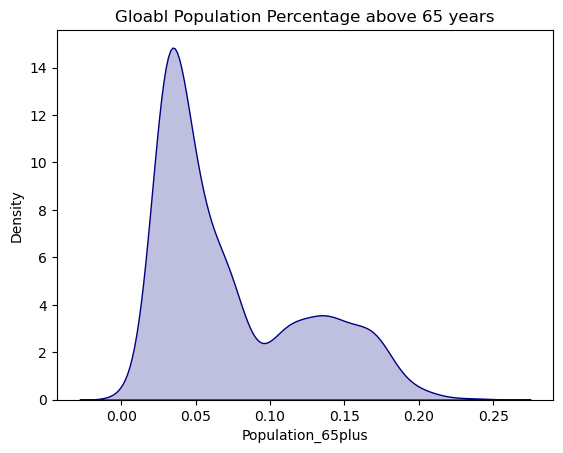

In [41]:
# Plotting Global Population % from  0 to 14 years
sns.kdeplot(df['Population_65plus'], shade=True, color='navy')
plt.title('Gloabl Population Percentage above 65 years')
plt.show()

count    2.704000e+03
mean     3.145729e+07
std      1.242894e+08
min      1.887600e+04
25%      8.783360e+05
50%      5.800324e+06
75%      2.014089e+07
max      1.350695e+09
Name: Population_Total, dtype: float64


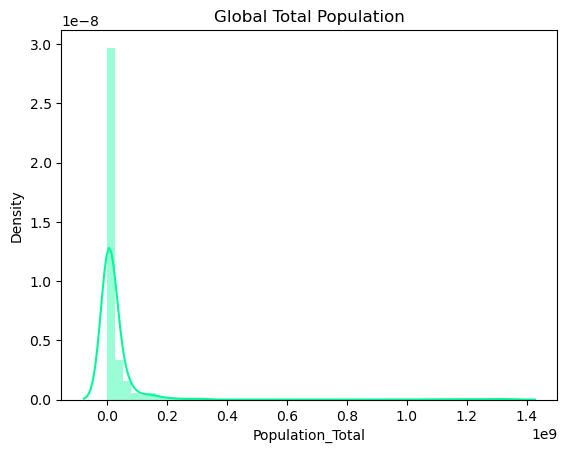

In [42]:
# Global Total Population Representation
print(df['Population_Total'].describe())
sns.distplot(df['Population_Total'],color='mediumspringgreen')
plt.title('Global Total Population')
plt.show()

### Key Observations:
1. The Total population is positively skewed distribution

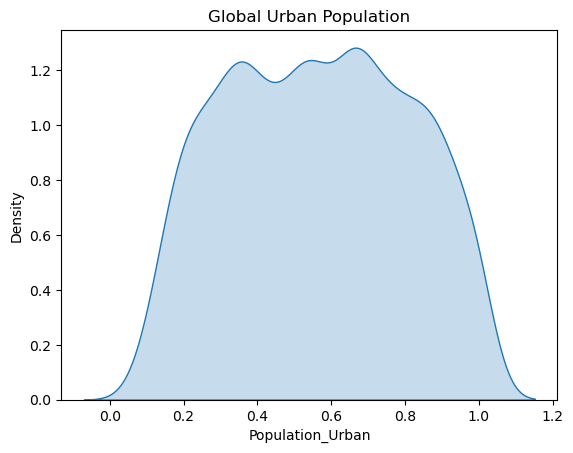

In [43]:
# plotting Global urban population
sns.kdeplot(df['Population_Urban'], shade=True)
plt.title('Global Urban Population')
plt.show()

In [44]:
# converting string to float
df['Tourism_Inbound']=df['Tourism_Inbound'].astype(float)

In [45]:
# converting string to float
df['Tourism_Outbound']=df['Tourism_Outbound'].astype(float)

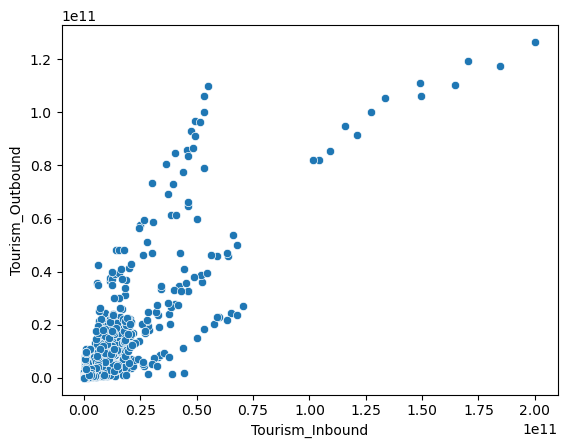

In [46]:
# Representation of Tourism Inbound and Tourism outbound Data using Scatterplot
sns.scatterplot(x='Tourism_Inbound',y='Tourism_Outbound',data=df)
plt.show()

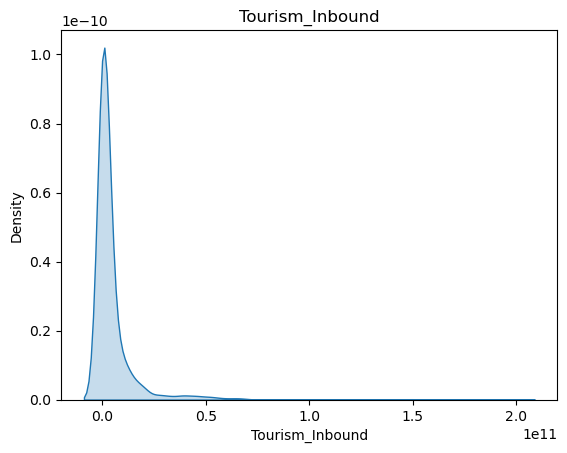

In [47]:
# Plotting tourism Inbound data
sns.kdeplot(df['Tourism_Inbound'], shade=True)
plt.title('Tourism_Inbound')
plt.show()

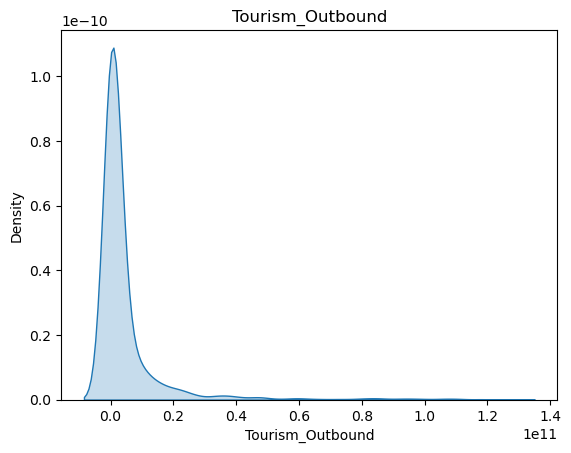

In [48]:
# Plotting tourism Inbound data
sns.kdeplot(df['Tourism_Outbound'], shade=True)
plt.title('Tourism_Outbound')
plt.show()

In [49]:
# Null Values Percentage
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        print(i,a)
        if a>=0:
            null_pertanage.append(i)
null_per(df)    

Birth_Rate 4.400887573964497
Business_Tax_Rate 47.374260355029584
CO2_Emissions 21.412721893491124
Days_to_Start_Business 36.46449704142012
Ease_of_Business 93.15828402366864
Energy_Usage 33.98668639053255
GDP 7.766272189349112
Health_Exp%GDP 11.427514792899409
Health_Exp/Capita 11.427514792899409
Hours_to_do_Tax 47.633136094674555
Infant_Mortality_Rate 9.615384615384617
Internet_Usage 6.397928994082839
Lending_Interest 30.473372781065088
Life_Expectancy_Female 5.029585798816568
Life_Expectancy_Male 5.029585798816568
Mobile_Phone_Usage 6.17603550295858
Population_0to14 8.136094674556213
Population_15to64 8.136094674556213
Population_65plus 8.136094674556213
Population_Total 0.0
Population_Urban 0.9615384615384616
Tourism_Inbound 13.609467455621301
Tourism_Outbound 17.418639053254438
Country 0.0


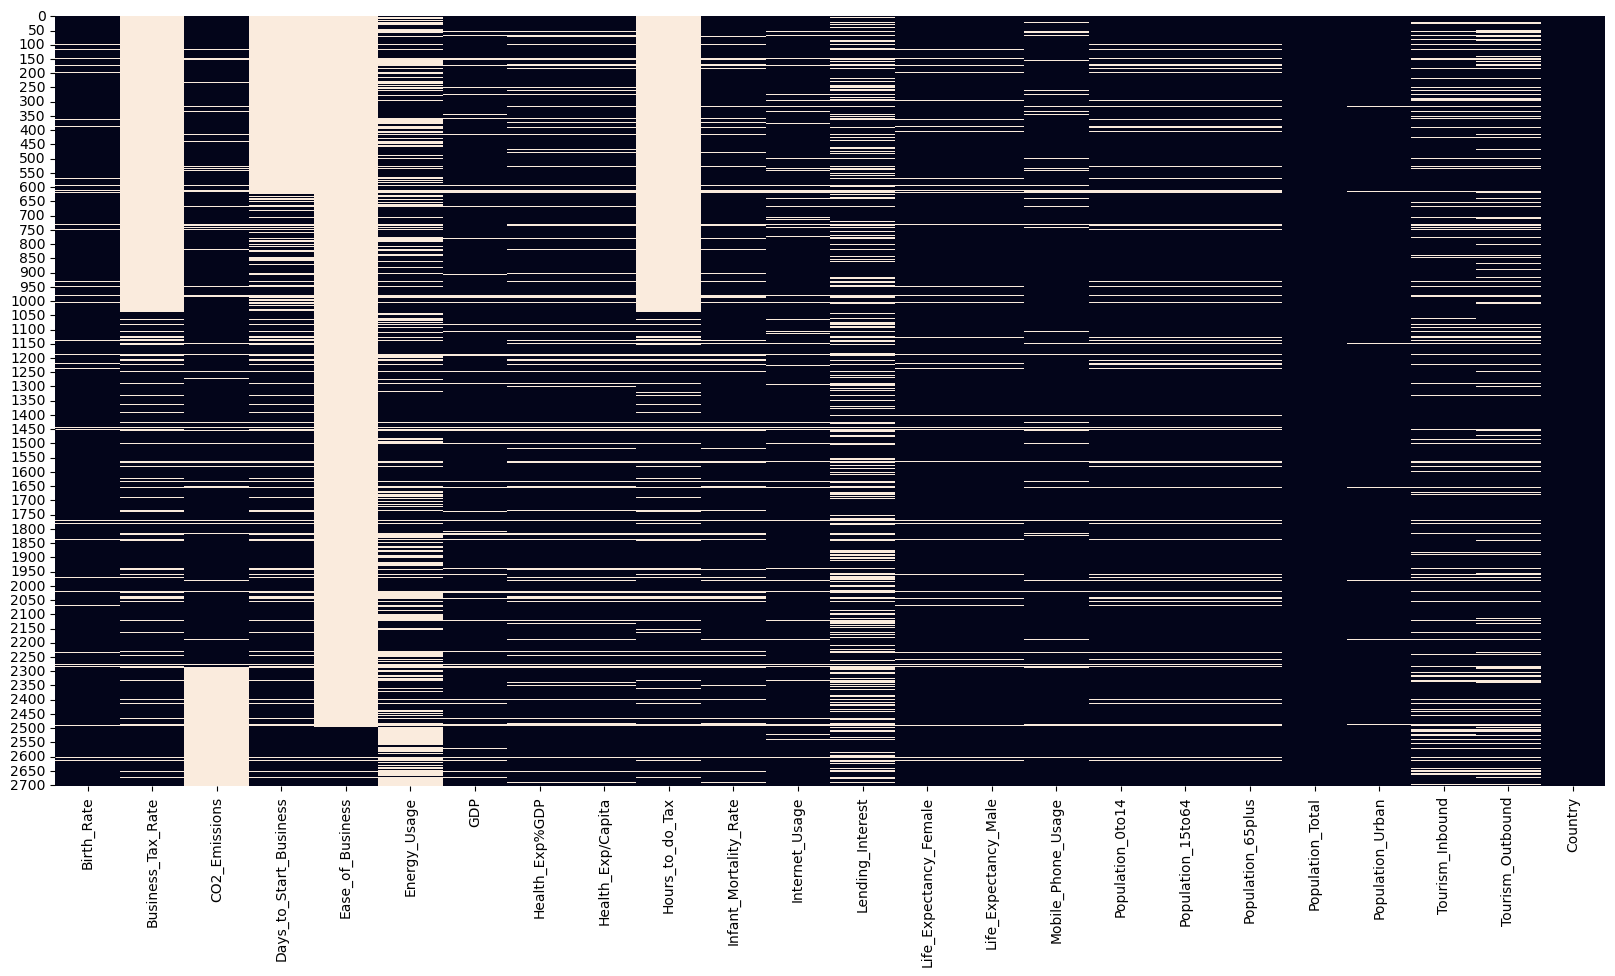

In [50]:
# Plotting missing values of the data by using Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Key Insights from above Heatmap:
1. The data set has many missing values
2. Ease of doing business has highest missing values, followed by Hours to do tax & Business Tax Rate
3. Country, Number of Records & Total Population are the only features which doesnt have any missing values

In [51]:
highest_gdp = df.groupby('Country')['GDP'].max()
highest_gdp=highest_gdp.sort_values(ascending=False)
highest_gdp.head(10)

Country
United States         1.624460e+13
China                 8.229490e+12
Japan                 5.937767e+12
Germany               3.628110e+12
United Kingdom        2.857083e+12
France                2.831795e+12
Brazil                2.476695e+12
Italy                 2.307312e+12
Russian Federation    2.017471e+12
India                 1.880100e+12
Name: GDP, dtype: float64

In [52]:
# Extracting data countrywise to understand the patterns of the data
US_data=df[df['Country']=='United States']
China_data=df[df['Country']=='China']
Japan_data=df[df['Country']=='Japan']
Germany_data=df[df['Country']=='Germany']
UK_data=df[df['Country']=='United Kingdom']
France_data=df[df['Country']=='France']
Brazil_data=df[df['Country']=='Brazil']
Italy_data=df[df['Country']=='Italy']
Russia_data=df[df['Country']=='Russian Federation']
India_data=df[df['Country']=='India']

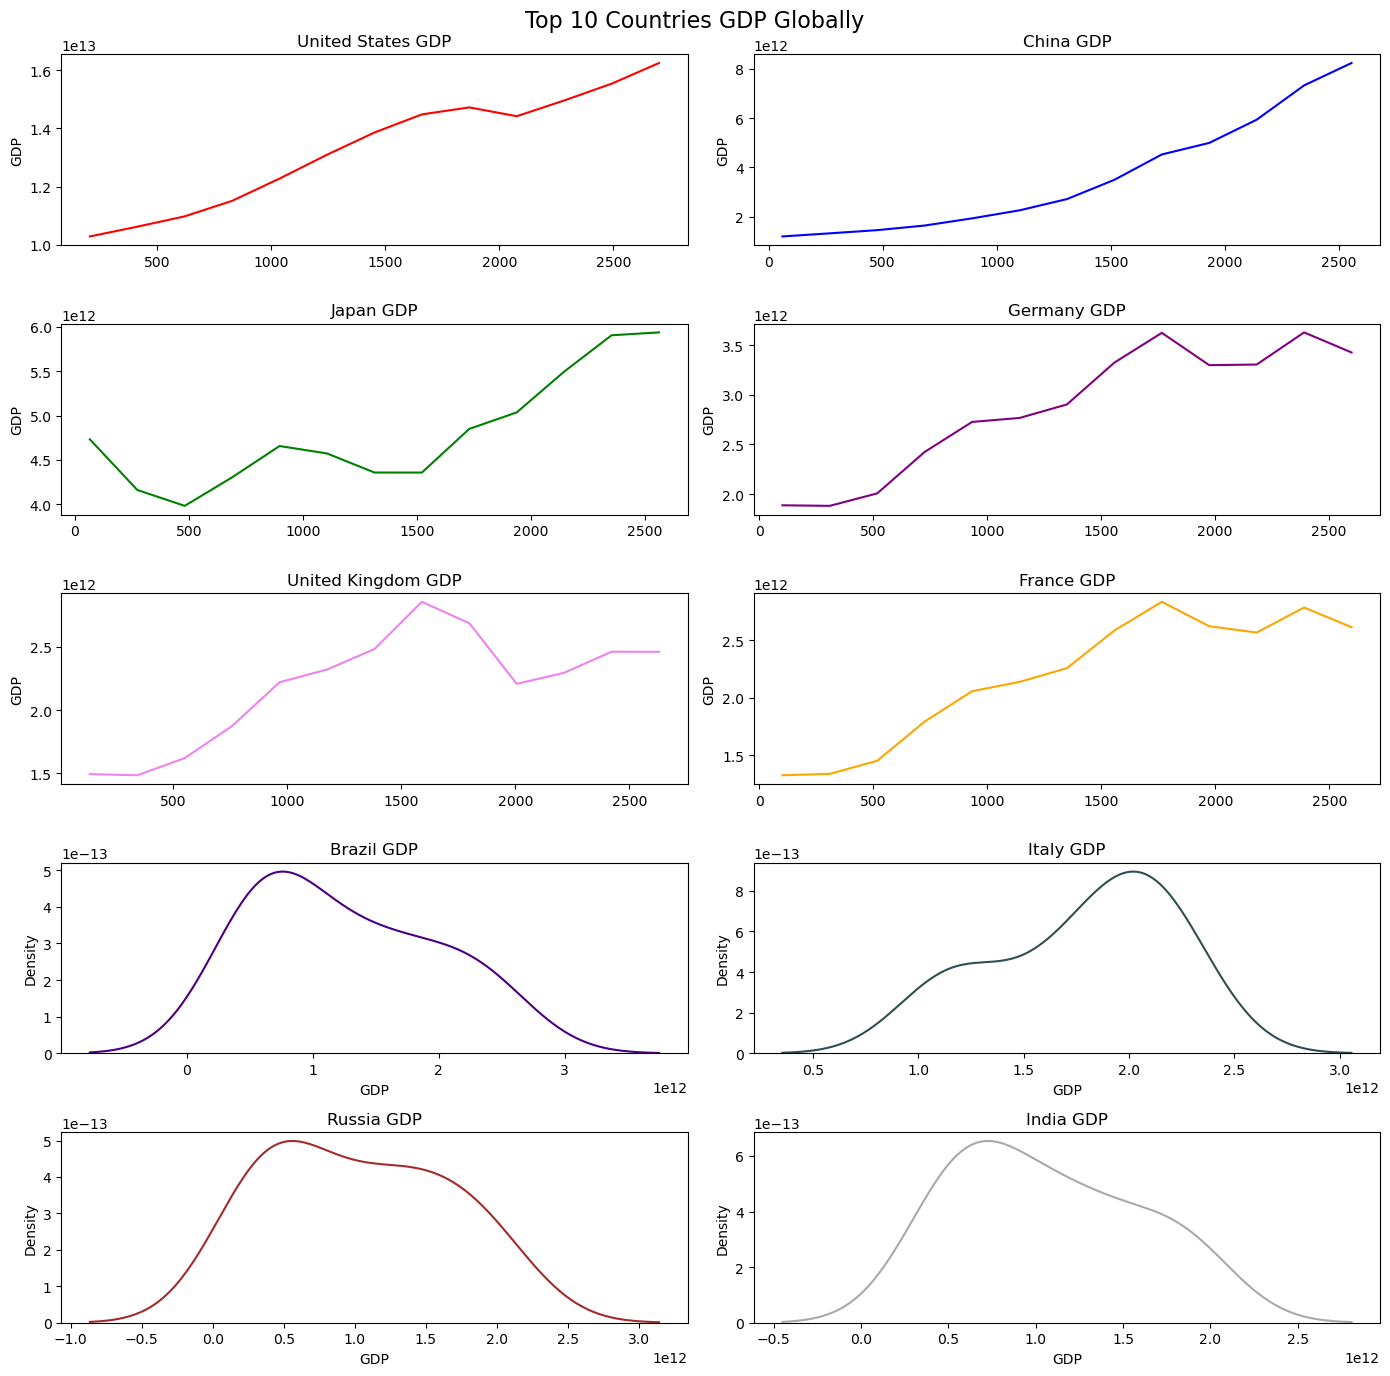

In [53]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))

#Plot KDE plots

sns.lineplot(ax=axes[0,0], data=US_data['GDP'],  color='red')
sns.lineplot(ax=axes[0,1], data=China_data['GDP'],  color='blue')
sns.lineplot(ax=axes[1,0], data=Japan_data['GDP'],  color='green')
sns.lineplot(ax=axes[1,1], data=Germany_data['GDP'],  color='purple')
sns.lineplot(ax=axes[2,0], data=UK_data['GDP'],  color='violet')
sns.lineplot(ax=axes[2,1], data=France_data['GDP'],  color='orange')
sns.kdeplot(ax=axes[3,0], data=Brazil_data['GDP'], color='indigo')
sns.kdeplot(ax=axes[3,1], data=Italy_data['GDP'], color='darkslategrey')
sns.kdeplot(ax=axes[4,0], data=Russia_data['GDP'], color='brown')
sns.kdeplot(ax=axes[4,1], data=India_data['GDP'], color='darkgrey')

#Set plot titles and labels
axes[0,0].set_title('United States GDP')
axes[0,1].set_title('China GDP')
axes[1,0].set_title('Japan GDP')
axes[1,1].set_title('Germany GDP')
axes[2,0].set_title('United Kingdom GDP')
axes[2,1].set_title('France GDP')
axes[3,0].set_title('Brazil GDP')
axes[3,1].set_title('Italy GDP')
axes[4,0].set_title('Russia GDP')
axes[4,1].set_title('India GDP')

fig.suptitle('Top 10 Countries GDP Globally', fontsize=16)
plt.tight_layout()
plt.show()

## Key Insights from the above lineplots:
1. The countries GDP line plots are not constant, GDP for the countries has a clear trend
2. We can observe that the countries United States, China, Japan , Germany, United kingdom & France are having clear increasing trend
3. Brazil, Italy, Russia and India are having decreasing Trend over a period of time

We can conclude that the data has a clear trend, its a time series data

## Handling Missing Values
### Applying Median imputation technique for the missing data less than or equal to 10%, if the nature of the data is  left or right skewed distribution

In [54]:
# Missing values imptatation with median, 4.40% missing data
median=df['Birth_Rate'].median()
df['Birth_Rate']=df['Birth_Rate'].fillna(median)

In [55]:
df['Birth_Rate'].isnull().sum()

0

In [56]:
# Dropping Ease of Business,it has 93% missing data
df=df.drop('Ease_of_Business', axis=True)

In [57]:
df['Hours_to_do_Tax'].isnull().sum()

1288

In [58]:
# Imputing Infant Mortality Rate, missing data: 9.61%
median=df['Infant_Mortality_Rate'].median()
df['Infant_Mortality_Rate']=df['Infant_Mortality_Rate'].fillna(median)

In [59]:
df['Infant_Mortality_Rate'].isnull().sum()

0

In [60]:
# Imputing  Internet Usage, missing data: 6.39%
median=df['Internet_Usage'].median()
df['Internet_Usage']=df['Internet_Usage'].fillna(median)

In [61]:
df['Internet_Usage'].isnull().sum()

0

In [62]:
# Imputing Life_Expectancy_Male, missing data is 5.029%
median=df['Life_Expectancy_Male'].median()
df['Life_Expectancy_Male']=df['Life_Expectancy_Male'].fillna(median)

In [63]:
df['Life_Expectancy_Male'].isnull().sum()

0

In [64]:
# Imputing Life_Expectancy_Female missing data, missing data is 5.029%
median=df['Life_Expectancy_Female'].median()
df['Life_Expectancy_Female']=df['Life_Expectancy_Female'].fillna(median)

In [65]:
df['Life_Expectancy_Female'].isnull().sum()

0

In [66]:
# Imputing Mobile phone usage missing data, missing data is 6.17%
median=df['Mobile_Phone_Usage'].median()
df['Mobile_Phone_Usage']=df['Mobile_Phone_Usage'].fillna(median)

In [67]:
df['Mobile_Phone_Usage'].isnull().sum()

0

In [68]:
# Imputing Urban Population missing data, missing data is 6.17%
median=df['Population_Urban'].median()
df['Population_Urban']=df['Population_Urban'].fillna(median)

In [69]:
df['Population_Urban'].isnull().sum()

0

### Imputing missing values for the features which has more than 10% missing values containing in the data by using Linear Interpolation forward and backward method, since the data has a time series pattern

In [70]:
# Imputing missing values with Linear Interpolatation forward and  backward linear interpolation
df = df.interpolate(method='linear', limit_direction='forward', axis=0)
df = df.interpolate(method='linear', limit_direction='backward', axis=0)

In [71]:
df.isnull().sum()

Birth_Rate                0
Business_Tax_Rate         0
CO2_Emissions             0
Days_to_Start_Business    0
Energy_Usage              0
GDP                       0
Health_Exp%GDP            0
Health_Exp/Capita         0
Hours_to_do_Tax           0
Infant_Mortality_Rate     0
Internet_Usage            0
Lending_Interest          0
Life_Expectancy_Female    0
Life_Expectancy_Male      0
Mobile_Phone_Usage        0
Population_0to14          0
Population_15to64         0
Population_65plus         0
Population_Total          0
Population_Urban          0
Tourism_Inbound           0
Tourism_Outbound          0
Country                   0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2704 non-null   float64
 1   Business_Tax_Rate       2704 non-null   float64
 2   CO2_Emissions           2704 non-null   float64
 3   Days_to_Start_Business  2704 non-null   float64
 4   Energy_Usage            2704 non-null   float64
 5   GDP                     2704 non-null   float64
 6   Health_Exp%GDP          2704 non-null   float64
 7   Health_Exp/Capita       2704 non-null   float64
 8   Hours_to_do_Tax         2704 non-null   float64
 9   Infant_Mortality_Rate   2704 non-null   float64
 10  Internet_Usage          2704 non-null   float64
 11  Lending_Interest        2704 non-null   float64
 12  Life_Expectancy_Female  2704 non-null   float64
 13  Life_Expectancy_Male    2704 non-null   float64
 14  Mobile_Phone_Usage      2704 non-null   

In [73]:
df.head(100)

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.020,76.9,87931.0,25.0,26998.000000,5.479006e+10,0.0350,60.0,451.0,0.034,...,67.0,0.0,0.342,0.619,0.0390,31719449,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.050,76.9,9542.0,25.0,7499.000000,9.129595e+09,0.0340,22.0,451.0,0.128,...,44.0,0.0,0.476,0.499,0.0250,13924930,0.324,3.400000e+07,1.460000e+08,Angola
2,0.043,76.9,1617.0,25.0,1983.000000,2.359122e+09,0.0430,15.0,451.0,0.090,...,53.0,0.0,0.454,0.517,0.0290,6949366,0.383,7.700000e+07,5.000000e+07,Benin
3,0.027,76.9,4276.0,25.0,1836.000000,5.788312e+09,0.0470,152.0,451.0,0.054,...,49.0,0.1,0.383,0.587,0.0290,1755375,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.046,76.9,1041.0,25.0,3327.333333,2.610959e+09,0.0510,12.0,451.0,0.096,...,49.0,0.0,0.468,0.505,0.0280,11607944,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.013,76.9,6850.0,25.0,2137.000000,9.314938e+09,0.0580,744.0,451.0,0.006,...,76.0,0.2,0.224,0.674,0.1020,943287,0.686,2.137000e+09,5.430000e+08,Cyprus
96,0.009,76.9,124649.0,25.0,40993.000000,5.880724e+10,0.0630,361.0,451.0,0.006,...,72.0,0.4,0.165,0.697,0.1380,10255063,0.740,2.973000e+09,1.276000e+09,Czech Republic
97,0.013,76.9,47260.0,25.0,18634.000000,1.600825e+11,0.0870,2613.0,451.0,0.005,...,74.0,0.6,0.185,0.667,0.1490,5339616,0.851,3.671000e+09,4.669000e+09,Denmark
98,0.010,76.9,15181.0,25.0,4715.000000,5.675698e+09,0.0530,213.0,451.0,0.009,...,65.0,0.4,0.180,0.669,0.1520,1396985,0.694,6.570000e+08,2.530000e+08,Estonia


In [74]:
a=df['Population_0to14']+df['Population_15to64']+df['Population_65plus']

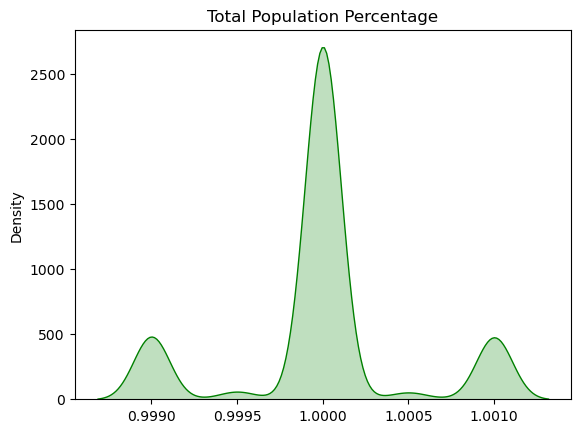

In [75]:
# Calculating Total Populaion Percentage(it should be 1) Pattern after imputing the missing values
sns.kdeplot(a, shade=True, color='green')
plt.title('Total Population Percentage')
plt.show()

### Key Insights from the above KDE plot:
-  We have unveiled the pattern that the sum of the Population from 0-14 & 15-64 & 64+ are equals to 1
-  After imputing the missing values we can observe that the data is lying in between 0.999 to 1.0010, hence we can say that we have imputed the missing data successfully without any deviation

In [76]:
df1=df.iloc[:,:-1] # Removed Country column

In [77]:
df1

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,76.90,87931.0,25.0,2.699800e+04,5.479006e+10,0.0350,60.0,451.0,0.034,...,71.0,67.0,0.0,0.3420,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,76.90,9542.0,25.0,7.499000e+03,9.129595e+09,0.0340,22.0,451.0,0.128,...,47.0,44.0,0.0,0.4760,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,76.90,1617.0,25.0,1.983000e+03,2.359122e+09,0.0430,15.0,451.0,0.090,...,57.0,53.0,0.0,0.4540,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,76.90,4276.0,25.0,1.836000e+03,5.788312e+09,0.0470,152.0,451.0,0.054,...,52.0,49.0,0.1,0.3830,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,76.90,1041.0,25.0,3.327333e+03,2.610959e+09,0.0510,12.0,451.0,0.096,...,52.0,49.0,0.0,0.4680,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,37.75,201747.0,23.0,1.993837e+06,8.134018e+12,0.1165,4933.5,192.5,0.020,...,75.0,69.0,0.5,0.2015,0.686,0.112,32427,0.911,1.334210e+11,8.440133e+10
2700,0.013,46.40,201747.0,5.0,2.132446e+06,1.624460e+13,0.1790,8895.0,175.0,0.006,...,81.0,76.0,1.0,0.1960,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.90,201747.0,7.0,2.132446e+06,5.000435e+10,0.0890,1308.0,310.0,0.010,...,80.0,74.0,1.5,0.2200,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.90,201747.0,144.0,2.132446e+06,3.812862e+11,0.0460,593.0,792.0,0.013,...,78.0,72.0,1.0,0.2880,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


## Assessing the clustering tendency of the data set by using Hopkins Statistic

- The Hopkins statistic measures the tendency of a dataset to cluster. It compares the distances between the data points and their nearest neighbors to the distances between a set of randomly generated points and their nearest neighbors. The data is highly clusterable, if the Hopkins statistic is closer to 1. The data is not clusterable, if the Hopkins statistic is closer to 0.5.

In [78]:
# Defining Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [79]:
hopkins(df1)

0.9897160088853032

### Insights from Hopkins Statistic:
- The given dataset is most suitable for creating a clustering model, since the hopkins statistic value is 0.9921 which is very very near to 1

## Scaling the Data

In [80]:
# Data normalization
from sklearn.preprocessing import scale

In [81]:
df1_normal=(df1-df1.mean())/df1.std()

In [82]:
df1_normal

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,-0.033665,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.147422,-0.362455,-0.356762
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.326123,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.976349,-0.367342,-0.360447
2,1.838249,0.522025,-0.275132,-0.228729,-0.325277,-0.244985,-0.842667,-0.554995,0.444292,2.032723,...,-1.370932,-1.482317,-1.245934,1.476753,-1.598102,-0.949208,-0.197184,-0.735249,-0.364252,-0.367973
3,0.396809,0.522025,-0.270296,-0.228729,-0.325860,-0.242071,-0.687703,-0.459521,0.444292,0.780082,...,-1.848527,-1.918629,-1.028607,0.804698,-0.569145,-0.949208,-0.238974,-0.126370,-0.353471,-0.355508
4,2.108519,0.522025,-0.276179,-0.228729,-0.319947,-0.244771,-0.532739,-0.557086,0.444292,2.241496,...,-1.848527,-1.918629,-1.245934,1.609270,-1.774494,-0.969279,-0.159703,-1.572969,-0.368133,-0.369541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.233821,-0.654764,0.088790,-0.271367,7.572846,6.665796,2.004796,2.872651,-0.752756,-0.402967,...,0.348411,0.262933,-0.159298,-0.913300,0.886095,0.716691,-0.252836,1.422391,9.219198,6.245086
2700,-0.864451,-0.394758,0.088790,-0.655108,8.122459,13.558665,4.426108,5.633374,-0.833794,-0.890105,...,0.921526,1.026480,0.927338,-0.965361,0.606806,1.198396,2.272249,1.013747,14.010851,9.551301
2701,-0.684271,-0.530021,0.088790,-0.612470,8.122459,-0.204493,0.939419,0.346082,-0.208643,-0.750923,...,0.826007,0.808324,2.013974,-0.738187,0.195224,1.278681,-0.225780,1.573589,-0.210090,-0.291299
2702,-0.233821,0.071148,0.088790,2.308223,8.122459,0.077050,-0.726444,-0.152193,2.023376,-0.646536,...,0.634969,0.590167,0.927338,-0.094530,0.386316,-0.327005,-0.012089,1.332489,-0.304815,-0.120859


## Lets try PCA for Dimensionality Reduction:
- Main objective is to capture the most of the information, reducing the dimensions without loosing much of the information
- It removes multicollinearity issues 
- It will extracts the most important features from a dataset to reduce the complexity of a model 

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca=PCA()
pca_values=pca.fit_transform(df1_normal)


In [85]:
pca_values

array([[-1.29771987e+00, -3.23976021e-01,  1.27789258e+00, ...,
         3.51344894e-01,  7.50181539e-02, -1.06775744e-04],
       [-6.48994601e+00,  1.80082956e+00, -1.12616767e+00, ...,
        -4.03687473e-02, -1.97061686e-01, -2.08370146e-04],
       [-4.74642043e+00,  1.05135378e+00, -5.77042123e-01, ...,
        -6.88562217e-02, -1.57977570e-01, -6.24664380e-05],
       ...,
       [ 3.84123600e+00,  2.03617211e+00,  5.86930670e-01, ...,
         4.33205548e-01,  1.37965902e-01, -5.65399410e-03],
       [ 1.99451806e+00,  2.62897665e+00,  2.95263020e+00, ...,
         1.73499886e-01,  5.54406909e-02,  1.58042808e-03],
       [ 2.81732508e+00,  2.32343906e+00,  3.18243413e+00, ...,
         4.47739742e-01,  1.59392981e-01, -6.26369151e-03]])

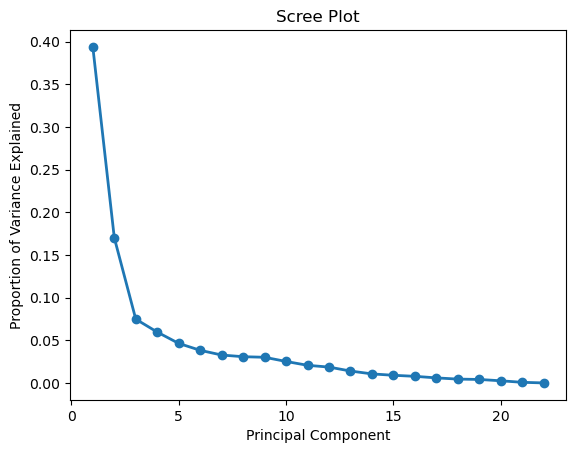

In [86]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [87]:
pca = PCA(n_components = 14)
pca_values_14 = pca.fit_transform(df1_normal)

In [88]:
pca_values_14

array([[-1.29771987, -0.32397602,  1.27789258, ..., -0.39482189,
        -0.1324237 ,  0.17921296],
       [-6.48994601,  1.80082956, -1.12616767, ..., -0.30254543,
        -0.22492569, -0.21645814],
       [-4.74642043,  1.05135378, -0.57704212, ..., -0.04019948,
        -0.16631203, -0.23898786],
       ...,
       [ 3.841236  ,  2.03617211,  0.58693067, ...,  0.61151697,
        -2.90527082,  0.05668121],
       [ 1.99451806,  2.62897665,  2.9526302 , ...,  1.18912924,
        -2.94959741,  1.15654789],
       [ 2.81732508,  2.32343906,  3.18243413, ...,  0.30498006,
        -3.35259279,  0.12754337]])

In [89]:
var=pca.explained_variance_ratio_
var

array([0.39397603, 0.17020769, 0.07477729, 0.05961275, 0.04634617,
       0.03823518, 0.03271395, 0.03074445, 0.03008158, 0.02516595,
       0.02065866, 0.01856849, 0.01394478, 0.01057515])

In [90]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.4 , 56.42, 63.9 , 69.86, 74.49, 78.31, 81.58, 84.65, 87.66,
       90.18, 92.25, 94.11, 95.5 , 96.56])

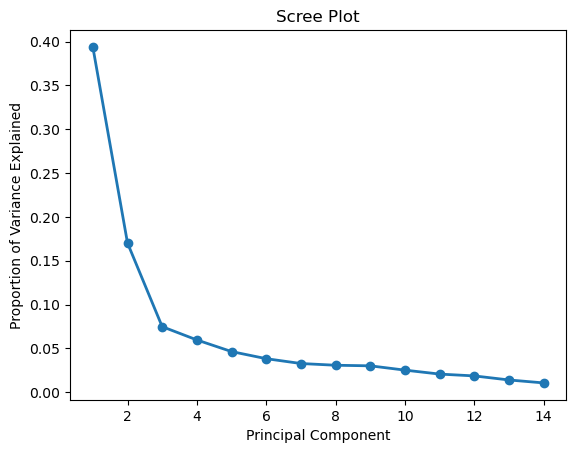

In [91]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

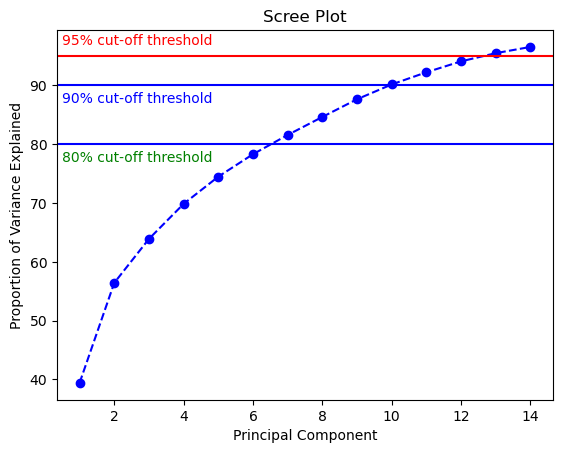

In [92]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(explained_variance_ratio)+1), var1, marker='o' ,linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 97, '95% cut-off threshold', color = 'red', fontsize=10)
plt.axhline(y=90, color='b', linestyle='-')
plt.text(0.5, 87, '90% cut-off threshold', color = 'blue', fontsize=10)
plt.axhline(y=80, color='b', linestyle='-')
plt.text(0.5, 77, '80% cut-off threshold', color = 'Green', fontsize=10)
plt.title('Scree Plot')
plt.show()


### Key Insights from above Lineplot:
1. We can observe that the 78 % of the variance captured with 6 Principal Components.
2. 90 % of the variance captured with 10 PCA's.
3. 95% of the variance captured with 13 PCA's

In [93]:
PCA_data=pd.DataFrame(pca_values_14[:,0:6], columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

In [94]:
PCA_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.297720,-0.323976,1.277893,0.244183,-0.676392,-0.663656
1,-6.489946,1.800830,-1.126168,1.433026,1.464698,4.099089
2,-4.746420,1.051354,-0.577042,0.865537,0.463042,1.783254
3,-3.137237,0.420005,0.029029,0.278939,-0.365778,-0.273262
4,-5.050925,1.310778,-0.884643,-0.095022,-0.572099,-0.381833


## Factor Analysis Vs. Principle Component Analysis
- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.

## Using Factor Analysis for Dimensionality Reduction &  for Building Model
- Most importantly to unveil key factors which are influencing the results and giving high variance & also for interpreting the results

In [95]:
!pip install factor-analyzer

In [96]:
from factor_analyzer import FactorAnalyzer
n_factors=10
fa = FactorAnalyzer(n_factors=n_factors)
factors=fa.fit(df1_normal)
factors

FactorAnalyzer(n_factors=10, rotation_kwargs={})

In [97]:
ev, v = fa.get_eigenvalues()

In [98]:
ev

array([8.66747274e+00, 3.74456911e+00, 1.64510032e+00, 1.31148047e+00,
       1.01961580e+00, 8.41173954e-01, 7.19706818e-01, 6.76378001e-01,
       6.61794856e-01, 5.53650896e-01, 4.54490590e-01, 4.08506828e-01,
       3.06785177e-01, 2.32653218e-01, 1.97290368e-01, 1.70177612e-01,
       1.29898401e-01, 9.89600274e-02, 8.94931213e-02, 5.50364492e-02,
       1.57510376e-02, 1.41952646e-05])

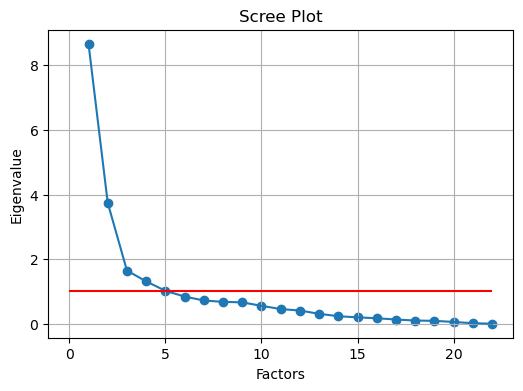

In [99]:
# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df1_normal.shape[1]+1),ev)
plt.plot(range(1,df1_normal.shape[1]+1),ev)
plt.hlines(1, 0, df1_normal.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [100]:
fa.loadings_

array([[-0.95689843,  0.03935304, -0.02357549,  0.07669405,  0.09668559,
         0.04294767, -0.18876491, -0.05356754,  0.21632242, -0.02682129],
       [-0.11262376, -0.00646072,  0.00462262, -0.06592249,  0.00620267,
         0.6003474 , -0.01190827,  0.00554444, -0.00739851, -0.24294078],
       [ 0.04860928,  0.09623685,  0.81161139,  0.01146768,  0.023176  ,
         0.0032161 , -0.05556693,  0.10270975, -0.01809897, -0.04116028],
       [-0.03061761,  0.01775852, -0.00391415, -0.02122454,  0.02657943,
        -0.05742008,  0.00206921, -0.05884319,  0.01568648,  0.42152865],
       [ 0.04804794,  0.45490173,  0.50378942,  0.05528348, -0.09827681,
        -0.04432015, -0.10468616,  0.12075151, -0.04354619,  0.04310114],
       [ 0.00421708,  0.95677161,  0.01396781, -0.00745121, -0.05330984,
         0.01560607, -0.06679585,  0.07492823, -0.01116822,  0.03521614],
       [ 0.0310231 ,  0.07134936, -0.04254062,  0.01338946,  0.0584697 ,
        -0.04885908,  0.11128332,  0.58739332

In [101]:
fa.get_communalities()

array([1.02085011, 0.43679598, 0.68667513, 0.18712141, 0.50702094,
       0.93020665, 0.38808706, 0.84722443, 0.38930489, 1.0011363 ,
       0.4037599 , 0.09359652, 1.1139879 , 1.00082175, 1.13715444,
       0.72881811, 1.1092796 , 0.65023688, 0.74054569, 0.55874506,
       0.94713527, 0.8892192 ])

In [102]:
# Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa_data=fa.fit(df1_normal)
loads = fa.loadings_
print(loads)

[[-9.34199001e-01 -9.03080606e-02 -1.39416698e-01 -6.33922652e-02
   1.39329038e-01]
 [-1.79151217e-01 -9.47880515e-03  3.63317804e-02 -4.76571633e-01
  -1.57608925e-02]
 [ 8.78283418e-02  8.59268661e-01  4.87606377e-02 -1.19662961e-02
  -9.04261868e-02]
 [-1.22131626e-01 -8.78036177e-04 -1.43635860e-01 -9.02852606e-02
   1.45476138e-02]
 [ 5.44791358e-02  8.66730008e-01  1.77911702e-01  1.43103815e-02
   4.17980002e-02]
 [ 6.56925765e-02  7.53934112e-01  5.16646473e-01 -1.20337864e-03
   2.47008038e-01]
 [ 7.46140321e-02  7.50696035e-02  5.55471332e-01  1.49063644e-02
  -2.15835998e-02]
 [ 3.44389332e-01  1.48517387e-01  6.90110471e-01  2.73474263e-01
  -9.65201617e-03]
 [-2.25495035e-02  6.00943490e-02 -1.11760245e-01 -4.64934034e-01
  -2.71453451e-02]
 [-9.04695006e-01 -4.33516147e-02 -9.38538864e-02 -1.99666571e-01
  -1.22864337e-01]
 [ 5.56875363e-01  3.35575449e-02  4.43527957e-01  5.00596959e-01
  -1.76535141e-01]
 [-2.88055529e-01 -8.22699528e-02 -3.93438079e-02 -2.22036007e-01

In [103]:
# Reset index of df1_normal and create a new DataFrame for the loadings
df1_normal = df1_normal.reset_index(drop=True)
loads = pd.DataFrame(loads, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'], index=df1_normal.columns)
print(loads)

                        Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Birth_Rate             -0.934199 -0.090308 -0.139417 -0.063392  0.139329
Business_Tax_Rate      -0.179151 -0.009479  0.036332 -0.476572 -0.015761
CO2_Emissions           0.087828  0.859269  0.048761 -0.011966 -0.090426
Days_to_Start_Business -0.122132 -0.000878 -0.143636 -0.090285  0.014548
Energy_Usage            0.054479  0.866730  0.177912  0.014310  0.041798
GDP                     0.065693  0.753934  0.516646 -0.001203  0.247008
Health_Exp%GDP          0.074614  0.075070  0.555471  0.014906 -0.021584
Health_Exp/Capita       0.344389  0.148517  0.690110  0.273474 -0.009652
Hours_to_do_Tax        -0.022550  0.060094 -0.111760 -0.464934 -0.027145
Infant_Mortality_Rate  -0.904695 -0.043352 -0.093854 -0.199667 -0.122864
Internet_Usage          0.556875  0.033558  0.443528  0.500597 -0.176535
Lending_Interest       -0.288056 -0.082270 -0.039344 -0.222036 -0.043925
Life_Expectancy_Female  0.938088  0.041189  0.11911

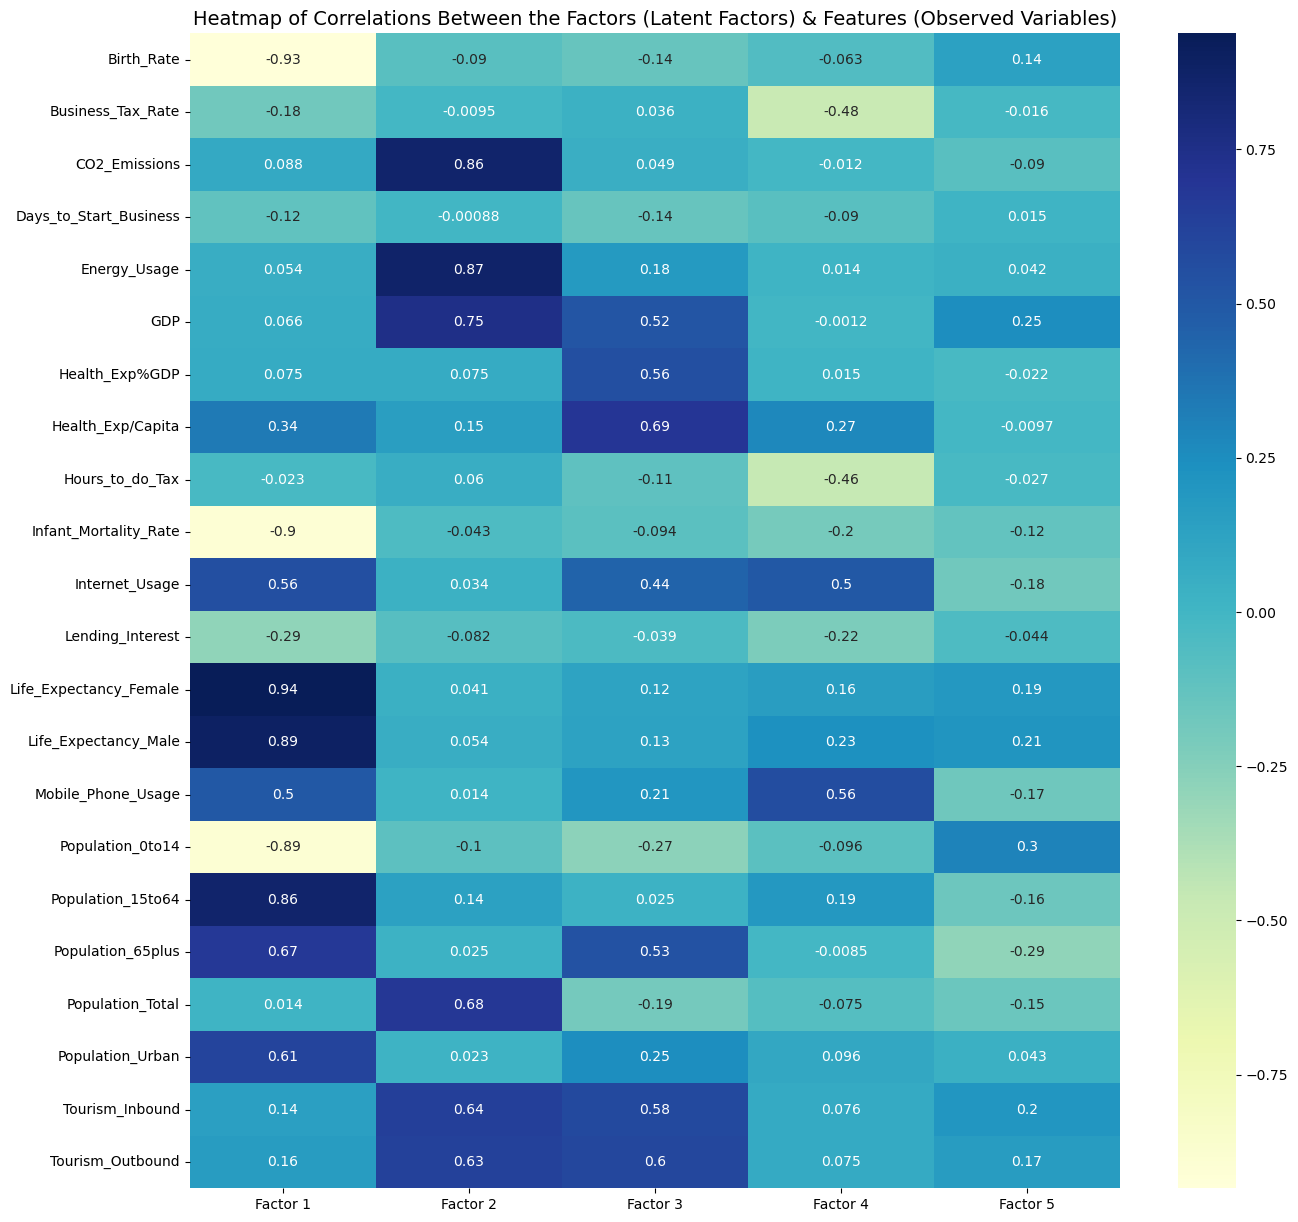

In [104]:
#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Correlations Between the Factors (Latent Factors) & Features (Observed Variables)', fontsize=14)
plt.show()

## Key Insights from Correlation Heatmap of Factors and Features:
- Factor 1: Life Expectancy Female, birth rate, infant mortality rate, life expectancy male and population from 0-14, 15-64 are highly influencing
- Factor 2: CO2 Emissions, Energy Usage GDP are highly influencing
- Factor 3: Health expenditure per capita, Tourism outbound & inbound are mostly impacting
- Factor 4: Mobile Phone usage & Internet usage are the influencing factors for the development

In [105]:
# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)

                       0         1         2         3         4
SS loadings     6.609026  3.421825  2.571553  1.332857  0.547496
Proportion Var  0.300410  0.155537  0.116889  0.060584  0.024886
Cumulative Var  0.300410  0.455948  0.572837  0.633421  0.658307


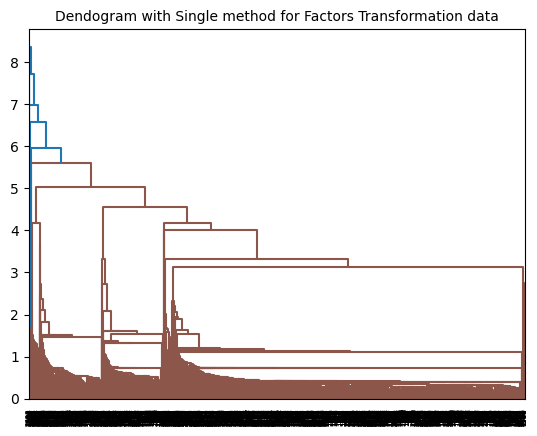

In [106]:
# Transforming the Factor Analysis data
factor_scores = fa.transform(df1_normal)

## Dendrogram representation for PCA data
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Dendogram with Single method for Factors Transformation data
dendrogram=sch.dendrogram(sch.linkage(factor_scores,method='single'))
plt.title('Dendogram with Single method for Factors Transformation data', fontsize=10)
plt.show()

- From the above Dendogram we can observe that the hierarchical relationships between the objects are overlapped with Single method

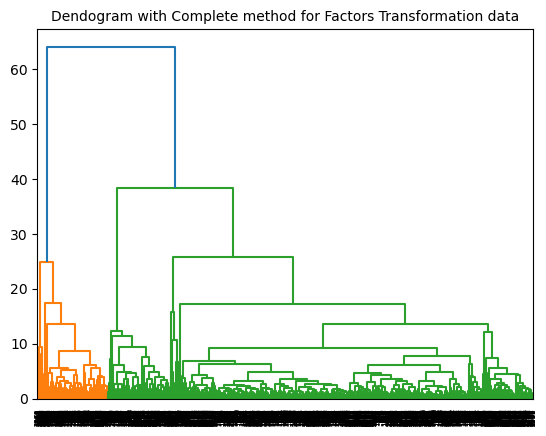

In [107]:
# Dendogram with Complete method for Factors Transformation data
dendrogram=sch.dendrogram(sch.linkage(factor_scores,method='complete'))
plt.title('Dendogram with Complete method for Factors Transformation data', fontsize=10)
plt.show()

- From the above Dendogram we can observe that the hierarchical relationships between the objects with complete method are much better than single method

## Building Hierarchical Clustering Model for Factor Scores Data

In [108]:
# Hierarchical Clsuering Model Building 
hierarchy_fa=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='single')
hierarchy_fa.fit(factor_scores)

AgglomerativeClustering(affinity='Euclidean', linkage='single', n_clusters=4)

In [110]:
hierarchy_fa_labels=hierarchy_fa.labels_
print(hierarchy_fa_labels)
print('The total clusters:',np.unique(hierarchy_fa_labels))

[0 0 0 ... 0 0 0]
The total clusters: [0 1 2 3]


## Hierarchical Clustering for Original Scaled Data

In [114]:
df1_normal['Country']=df['Country']
df1_normal.head(2)

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.147422,-0.362455,-0.356762,Algeria
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.976349,-0.367342,-0.360447,Angola


In [120]:
# Label Encoder for Country Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1_normal['Country']=le.fit_transform(df1_normal['Country'])
df1_normal.head(2)

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Energy_Usage,GDP,Health_Exp%GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0to14,Population_15to64,Population_65plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,-0.233821,0.522025,-0.118176,-0.228729,-0.226087,-0.200426,-1.152594,-0.523635,0.444292,0.084171,...,0.044777,-1.245934,0.416610,-0.098764,-0.748497,0.002109,0.147422,-0.362455,-0.356762,2
1,2.468879,0.522025,-0.260721,-0.228729,-0.303405,-0.239231,-1.191335,-0.550117,0.444292,3.354954,...,-2.464020,-1.245934,1.684995,-1.862691,-1.029492,-0.141061,-0.976349,-0.367342,-0.360447,5


In [124]:
hierarchy_norm=AgglomerativeClustering(n_clusters=4, affinity='Euclidean', linkage='single')

In [125]:
hierarchy_norm.fit(df1_normal)

AgglomerativeClustering(affinity='Euclidean', linkage='single', n_clusters=4)

In [128]:
hierarchy_norm_labels=hierarchy_norm.labels_
hierarchy_norm_labels
print('The Total clusters for Original Scaled data using Hierarchical Clustering are: ', np.unique(hierarchy_norm_labels))

The Total clusters for Original Scaled data using Hierarchical Clustering are:  [0 1 2 3]


## Building KMeans Clustering Model for Factor Scores Data

In [129]:
# KMeans Clustering for FA data
from sklearn.cluster import KMeans

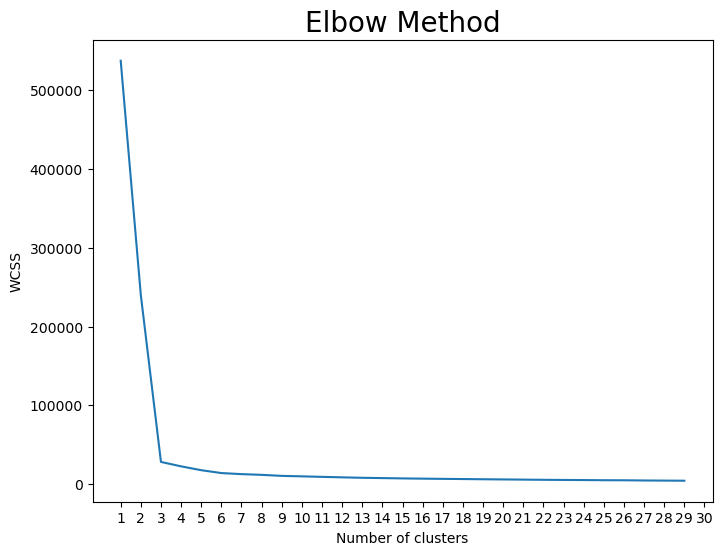

In [138]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(factor_scores)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method', fontsize=20)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Key Insights from the Above Plot:
- We can observe that the most of the variance is covered with 3 clusters
- There is not much variance in the plot after 3rd cluster, the line almost flattened through the all remaining clusters

In [145]:
# Lets build the KMeans model with 3 clusters
kmeans_fa = KMeans(n_clusters=3,random_state=0)
kmeans_fa.fit(factor_scores)

KMeans(n_clusters=3, random_state=0)

In [152]:
clusters_fa=kmeans_fa.labels_
np.unique(clusters_fa)

array([0, 1, 2])

## Building KMeans Clustering Model for Original Scaled Data

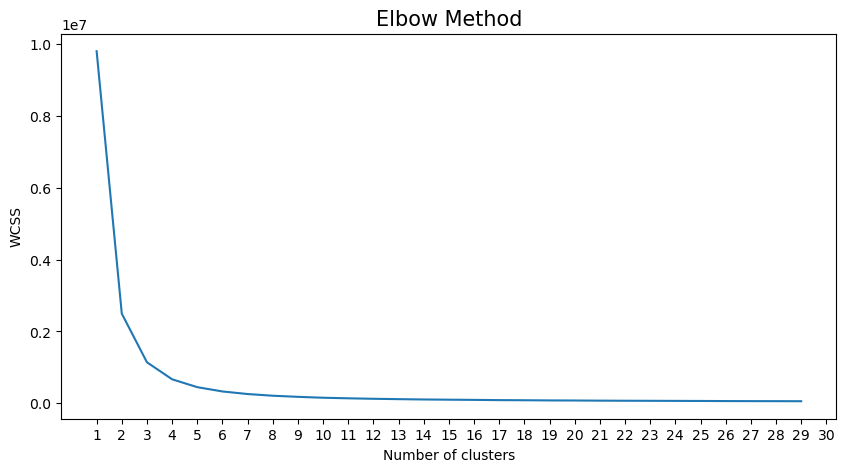

In [148]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1_normal)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))   
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method', fontsize=15)
plt.xticks(range(1, 31))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Key Insights from the Above Plot:
- We can observe that the most of the variance is covered with 4 clusters
- There is not much variance in the plot after 4rth cluster, the line almost flattened through the all remaining clusters

In [149]:
# Lets build the KMeans model with 4 clusters
kmeans_norm = KMeans(n_clusters=4,random_state=0)
kmeans_norm.fit(df1_normal)

KMeans(n_clusters=4, random_state=0)

In [151]:
clusters_norm=kmeans_norm.labels_
np.unique(clusters_norm)

array([0, 1, 2, 3])

- Highly developed countries, Moderately developed countries, Developing countries, Least developed countries